In [17]:
import pandas as pd
import wrangle as wr
import summaries as s
from importlib import reload
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(12, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

pd.options.display.float_format = '{:,.2f}'.format

# CUSTOMER TYPES DECOMPOSITION SUMMARY

|__CUSTOMER TYPE__|__SEASONALITY__|__TREND__|
|:-------------------|:-------------------|:-------------------|
|__All customers__|No seasonality|Positive trend. Sales in the end of 2019 and beginning of 2020 incresed a lot, than fell under the trend line and slowly reached the level of the trend line again.|
|__School districts__|There is a strong seasonal pattern in school distrits' purchases. Purchases are high in the middle of the year.|No trend at all till the middle of 2019. Strong positive trend after|
|__Higher Education Institutions__|There is some seasonality in data. Purchase amount increases around May-June and August|The trend is negative. Goes the opposite direction of the general trend|
|__Local Government__|Local goverments show a clear seasonal pattern with increase of purchases in the end of December - beginning of January, almost no purchases around February|Positive trend, follows the general trend|
|__State Agencies__|Follows the seasonality of Local governments|Positive trend, follows the general trend|
|__Others__|No strong seasonality|Even there is some kind of trend this line is less expressive as the general trend. Sales peaked in the beginning of pandemic and when down to a little bit above the pre-pandemic level and way above their trend.|

I'll make weekly and monthly decomposition for each group of customer types to see if they vary from the original data

In [6]:
df = s.get_summary_df(wr.get_clean_data(start2018=True))

In [8]:
def create_customertype_subgroups(train):
    
    types = train[['purchase_amount','customer_type']]
    k_12= types[types["customer_type"]=='K-12']
    local_gov = types[types["customer_type"]=='Local Government']
    state_agency = types[types["customer_type"]=='State Agency']
    higher_ed = types[types["customer_type"]=='Higher Ed']
    other = types[(types['customer_type']=='Assistance Org') | (types['customer_type']=="Other")]
    
    return k_12, local_gov, state_agency, higher_ed, other

In [9]:
train, test = wr.split_data(df)
validate = test.loc[:'2022-06'].copy() 
test = test.loc['2022-07':]

In [10]:
k_12, local_gov, state_agency, higher_ed, other = create_customertype_subgroups(train)

In [11]:
k_12.shape, local_gov.shape, state_agency.shape, higher_ed.shape, other.shape

((9632, 2), (10546, 2), (3110, 2), (6827, 2), (170, 2))

### School districts

#### Weekly

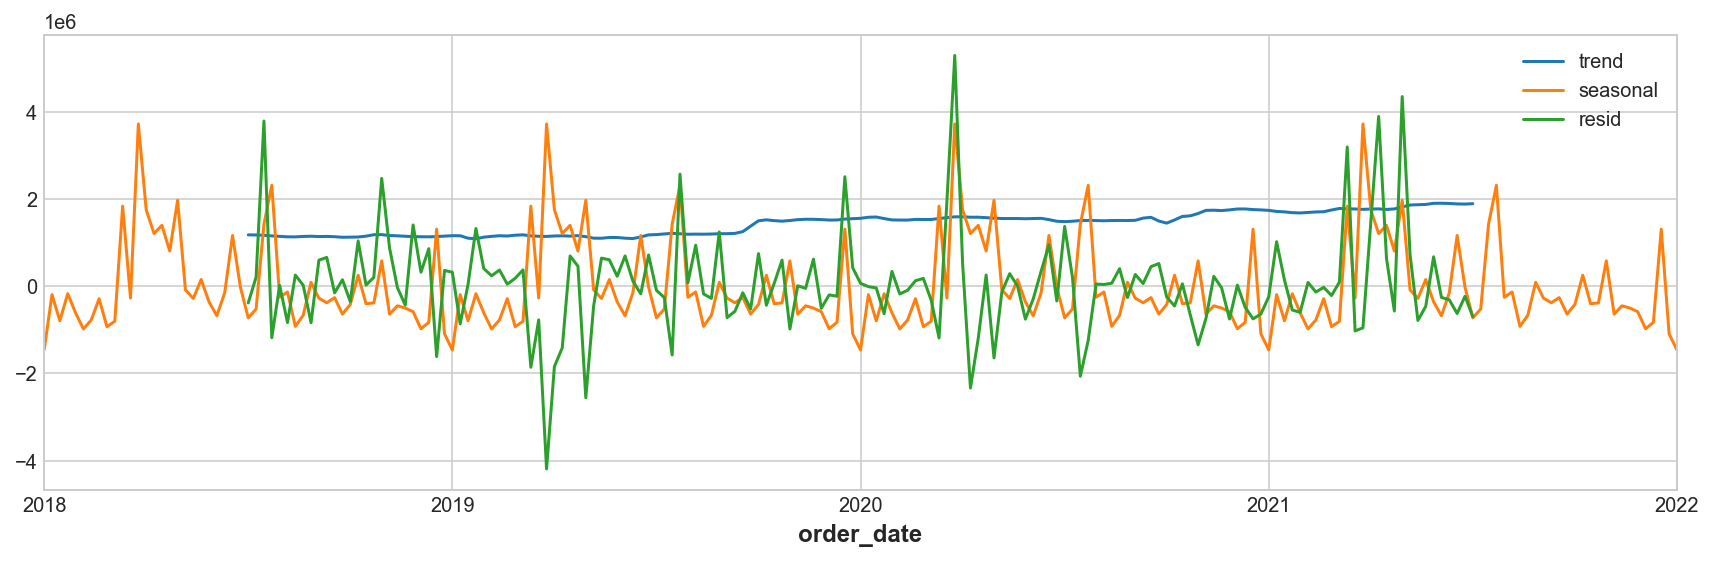

In [27]:
k_12w = k_12.purchase_amount.resample('W').sum()
result_k_12w = sm.tsa.seasonal_decompose(k_12w)
decomposition_k_12w = pd.DataFrame({
    'y': result_k_12w.observed,
    'trend': result_k_12w.trend,
    'seasonal': result_k_12w.seasonal,
    'resid': result_k_12w.resid,
})
decomposition_k_12w.iloc[:, 1:].plot();

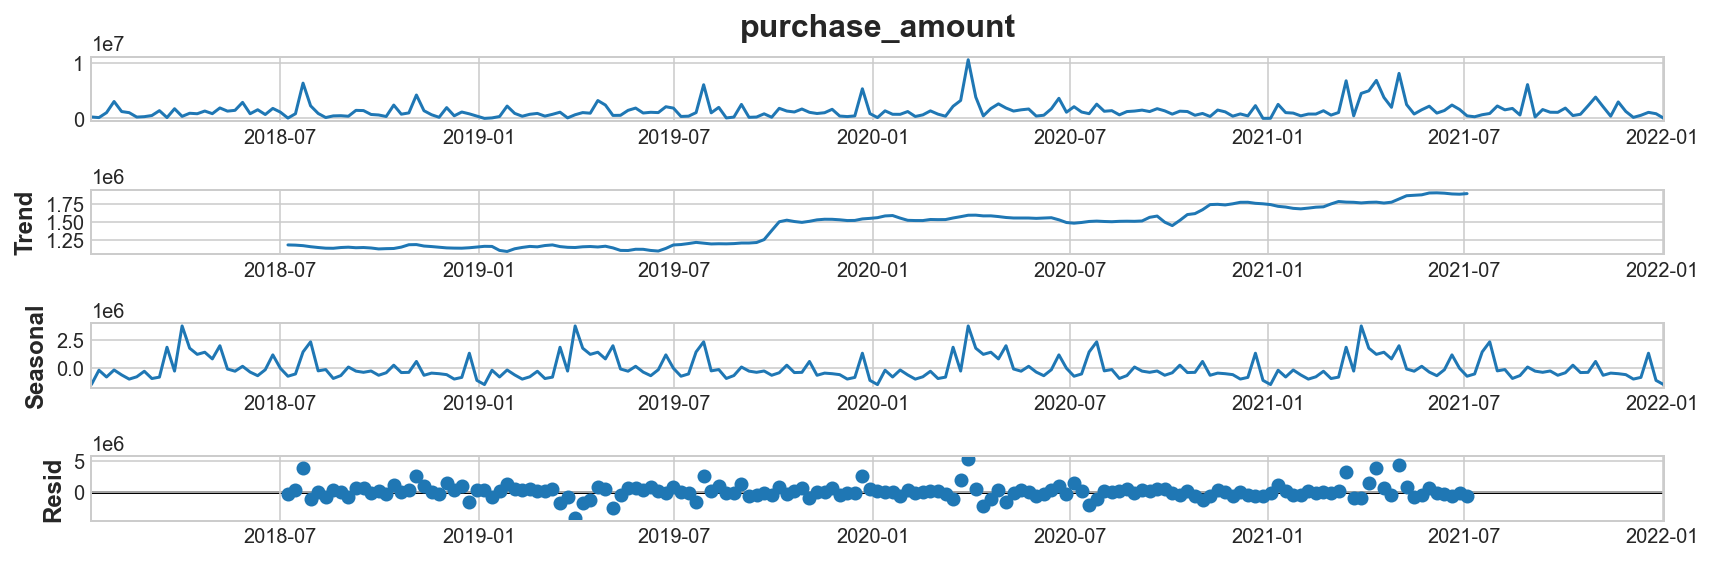

In [48]:
result_k_12w.plot()
None

#### Monthly

<AxesSubplot: xlabel='order_date'>

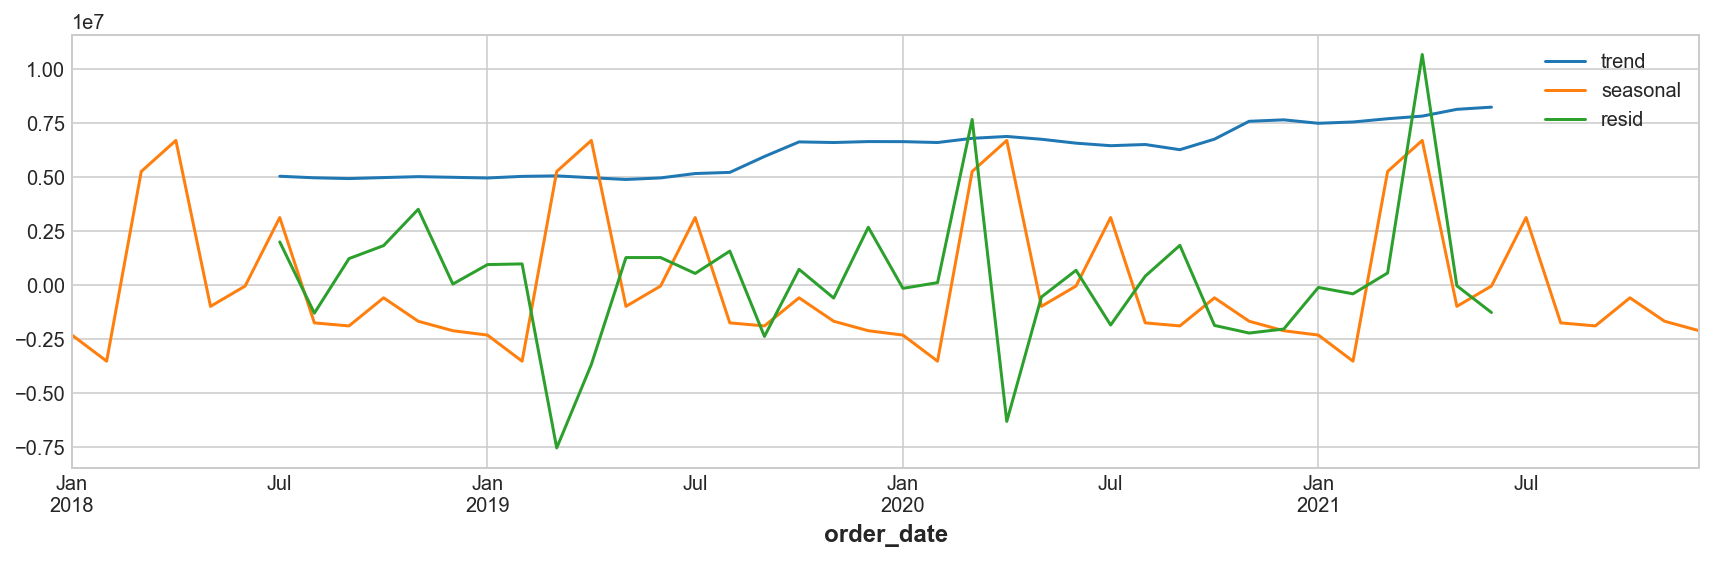

In [19]:
k_12m = k_12.purchase_amount.resample('M').sum()
result_k_12m = sm.tsa.seasonal_decompose(k_12m)
decomposition_k_12m = pd.DataFrame({
    'y': result_k_12m.observed,
    'trend': result_k_12m.trend,
    'seasonal': result_k_12m.seasonal,
    'resid': result_k_12m.resid,
})
decomposition_k_12m.iloc[:, 1:].plot()

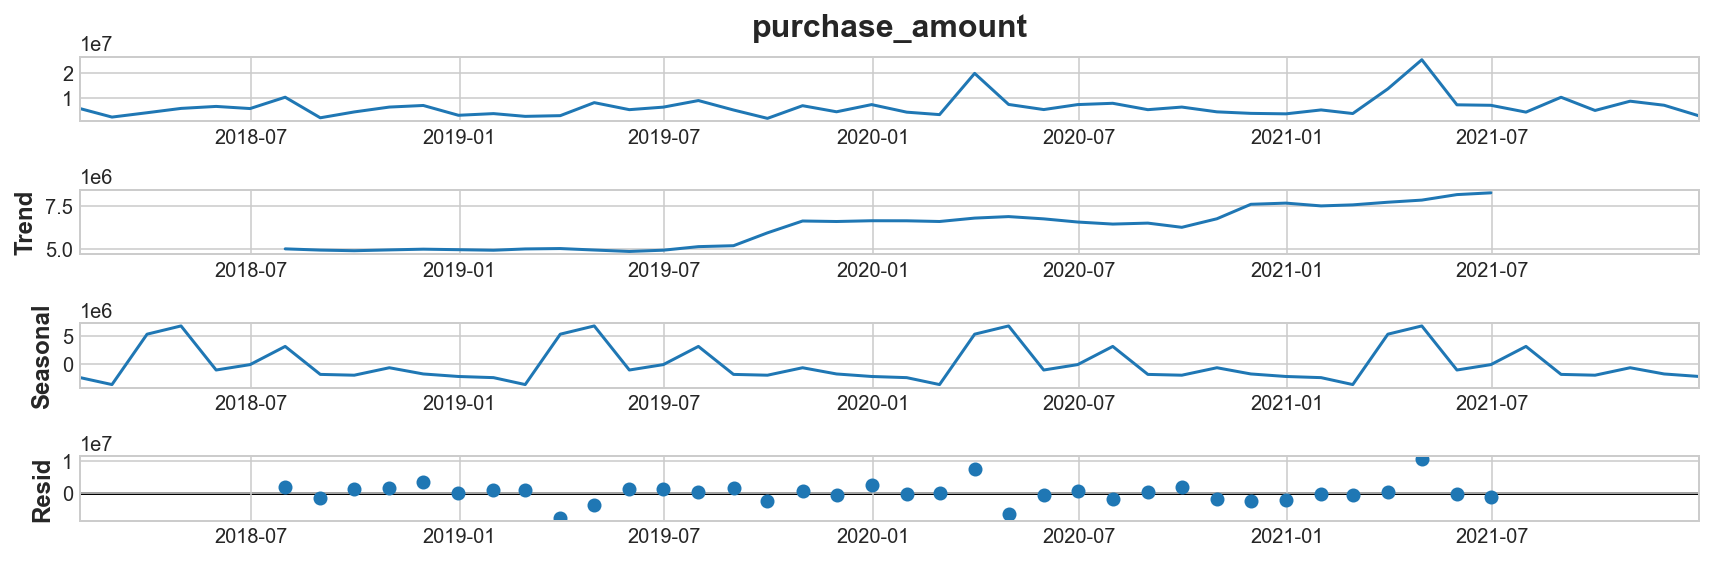

In [24]:
result_k_12m.plot()
None

#### School districts deomposition takeaways:
__Seasonality:__
- There is a strong seasonal pattern in school distrits' purchases. Purchases are high in the middle of the year.

__Trend:__
- There were no trend before the end of 2019. After schol districts started to have a positive trend.
- With weekly sales the trend is barely observed

### Higher Education

#### Weekly

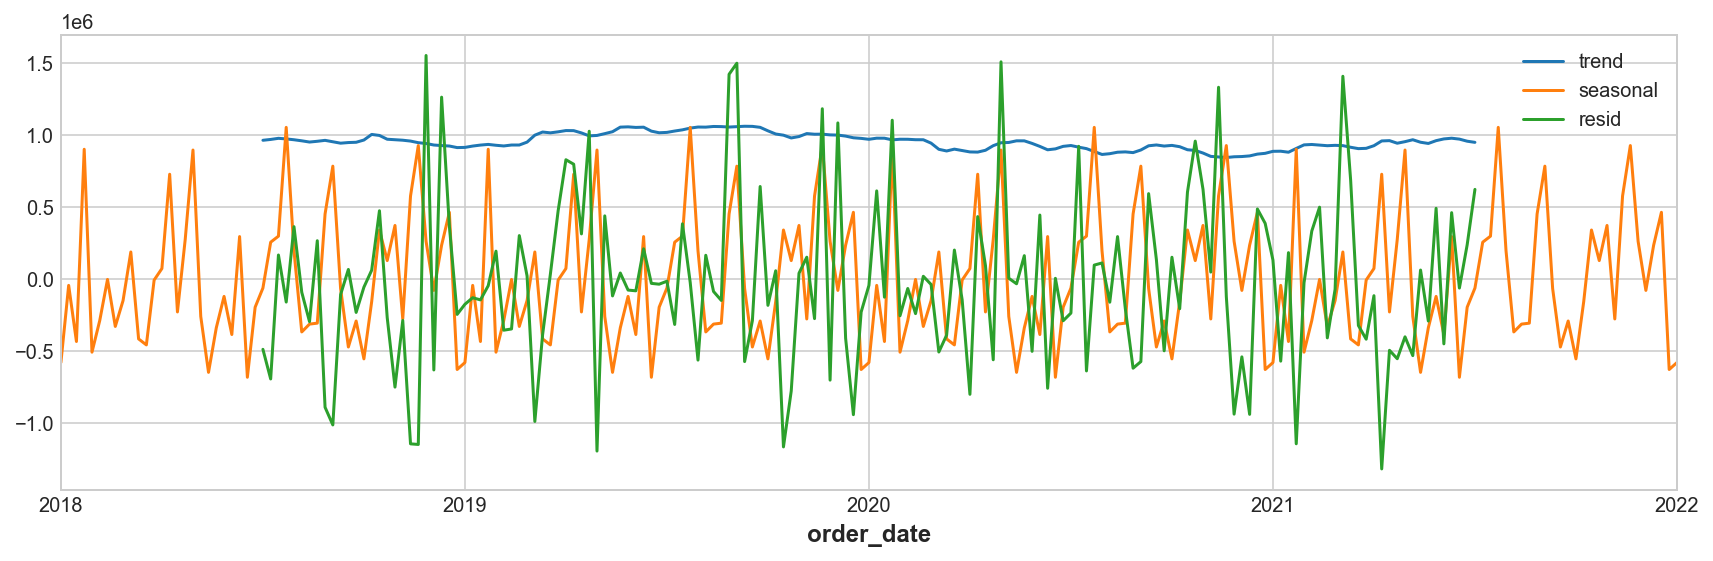

In [28]:
higher_ed_w = higher_ed.purchase_amount.resample('W').sum()
result_higher_ed_w = sm.tsa.seasonal_decompose(higher_ed_w)
decomposition_higher_ed_w = pd.DataFrame({
    'y': result_higher_ed_w.observed,
    'trend': result_higher_ed_w.trend,
    'seasonal': result_higher_ed_w.seasonal,
    'resid': result_higher_ed_w.resid,
})
decomposition_higher_ed_w.iloc[:, 1:].plot();

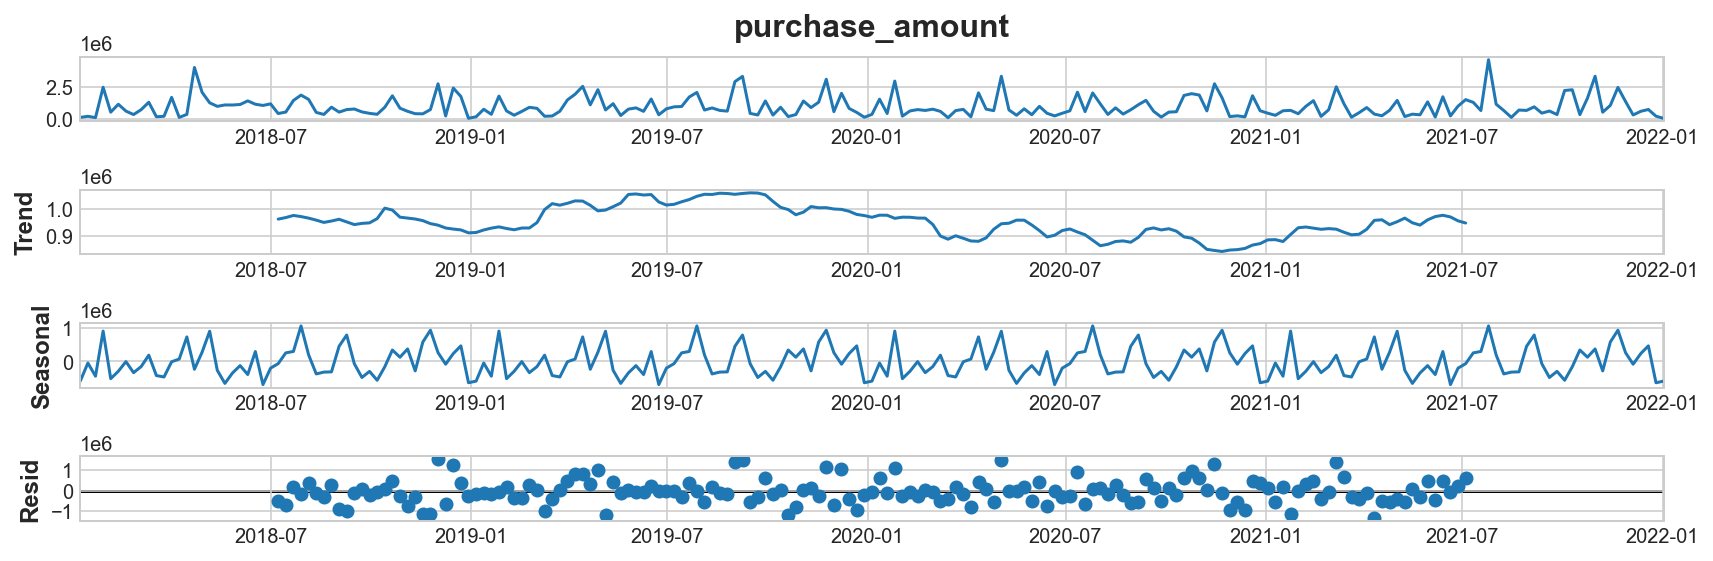

In [29]:
result_higher_ed_w.plot()
None

#### Monthly

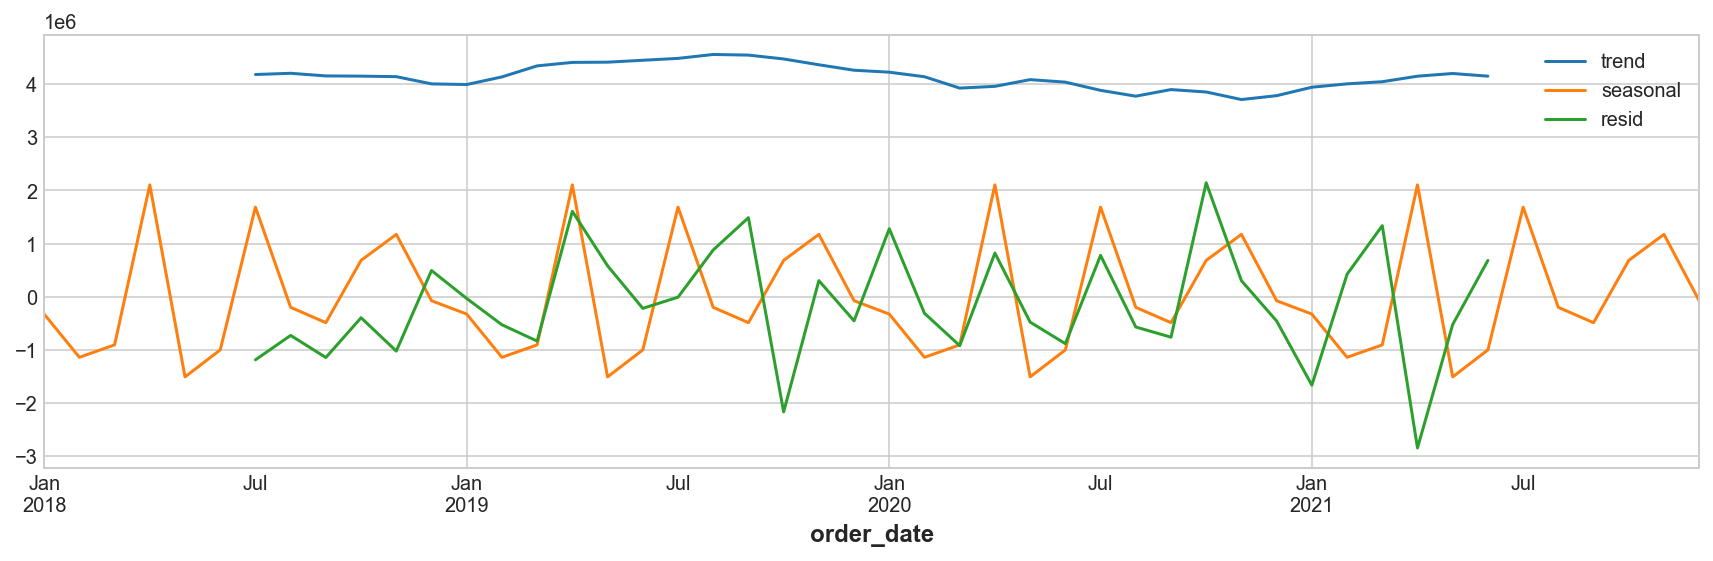

In [30]:
higher_ed_m = higher_ed.purchase_amount.resample('M').sum()
result_higher_ed_m = sm.tsa.seasonal_decompose(higher_ed_m)
decomposition_higher_ed_m = pd.DataFrame({
    'y': result_higher_ed_m.observed,
    'trend': result_higher_ed_m.trend,
    'seasonal': result_higher_ed_m.seasonal,
    'resid': result_higher_ed_m.resid,
})
decomposition_higher_ed_m.iloc[:, 1:].plot();

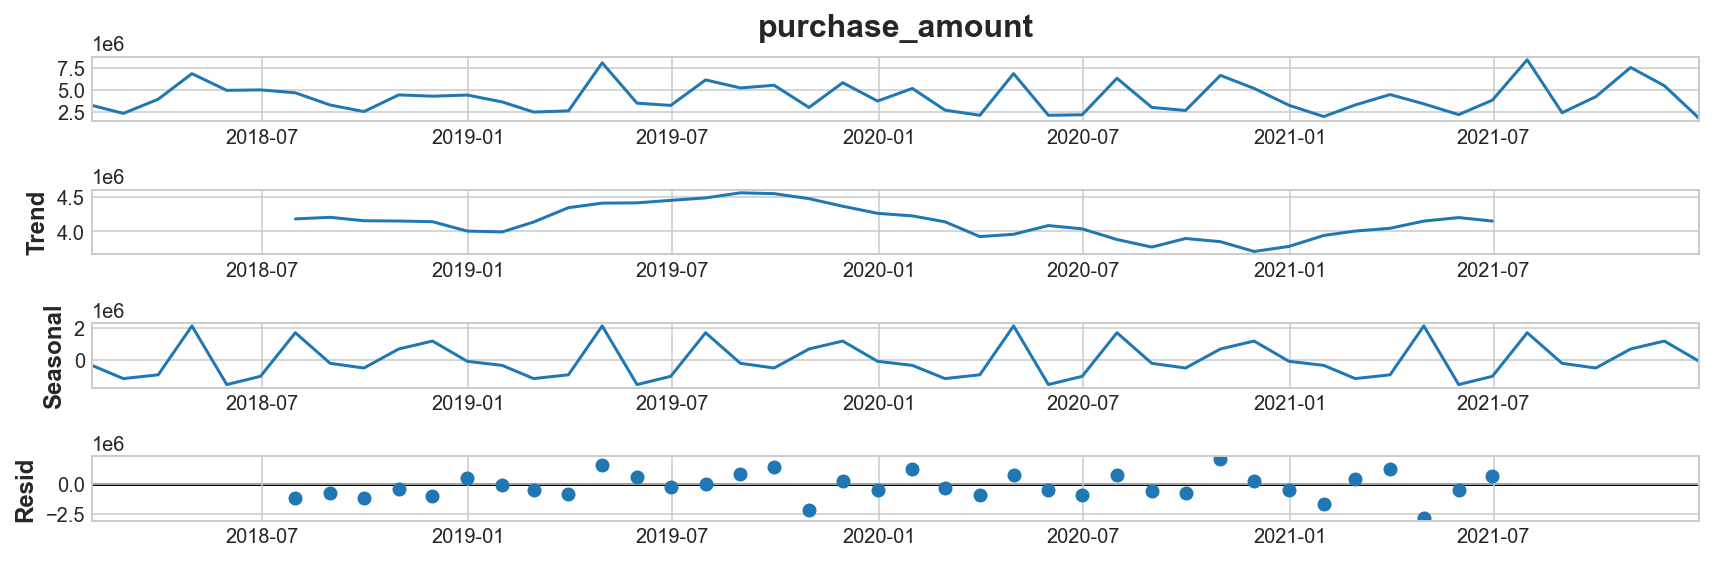

In [31]:
result_higher_ed_m.plot()
None

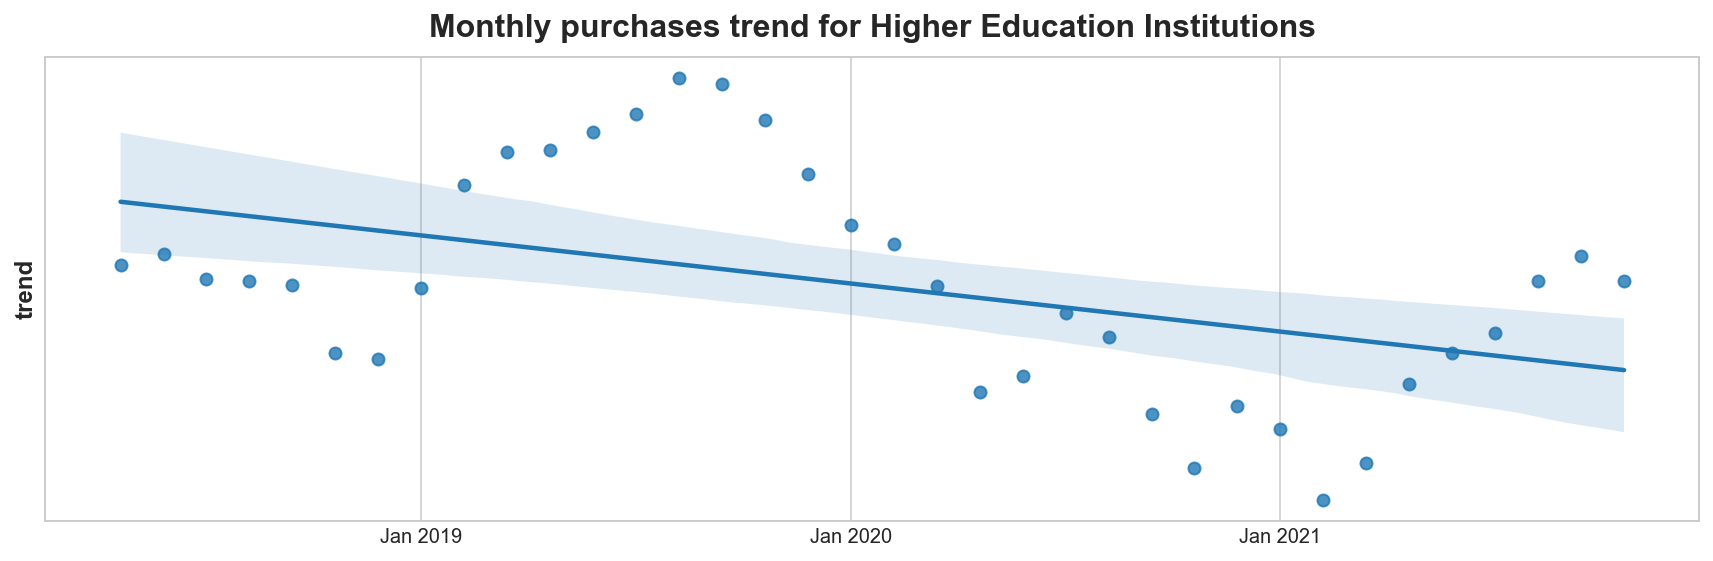

In [49]:
decomposition_higher_ed_m['time_dummy'] = np.arange(len(decomposition_higher_ed_m.index))
ax = sns.regplot(data=decomposition_higher_ed_m, x='time_dummy', y='trend')
plt.title('Monthly purchases trend for Higher Education Institutions')
plt.xlabel(None)
ax.set(xticks=[13, 23, 33])
ax.set(xticklabels=['Jan 2019', 'Jan 2020', 'Jan 2021'])
ax.set(yticks=[])
plt.show()

#### Higher Education takaways:
__Seasonality:__
- There is a clear seasonality in purchases. They raise somewhen in the 3rd quarter.

__Trend:__
- The higher education purchases have opposite trend from the general trend.

### Local Goverments

#### Weekly

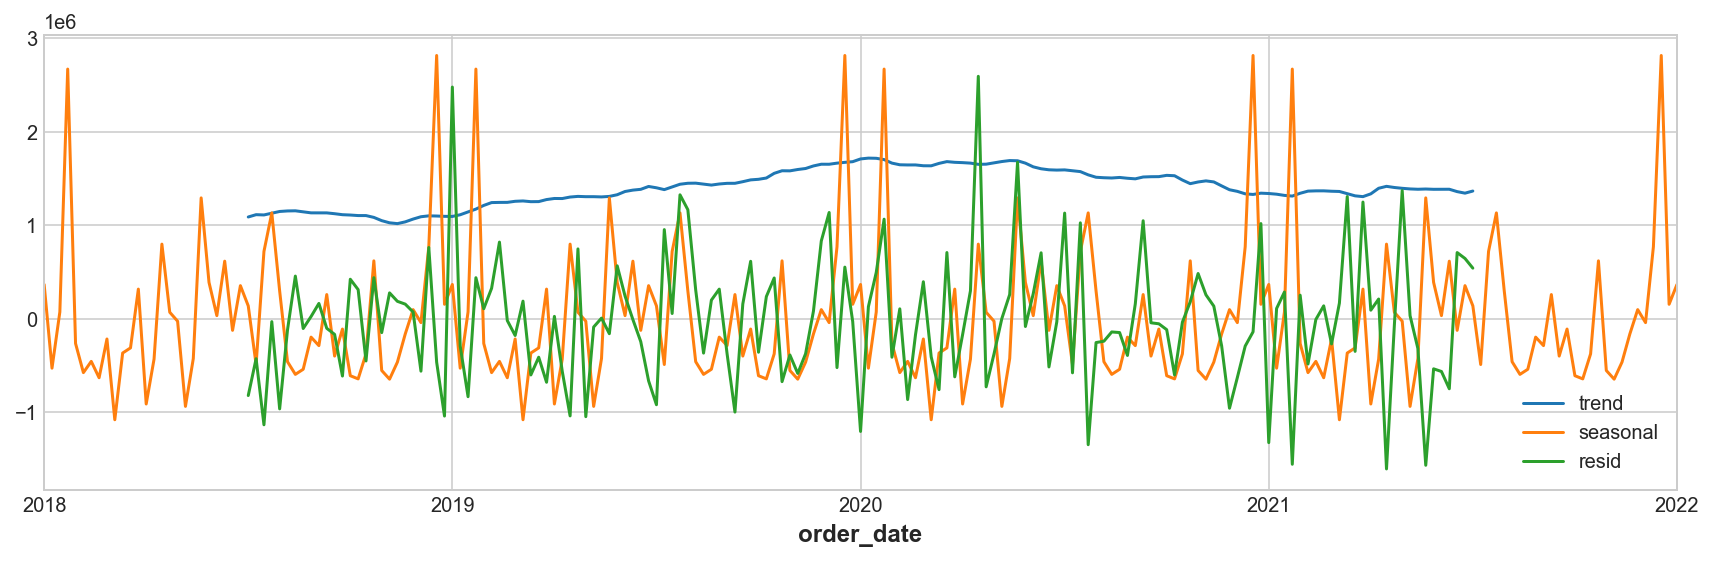

In [25]:
local_gov_w = local_gov.purchase_amount.resample('W').sum()
result_local_gov_w = sm.tsa.seasonal_decompose(local_gov_w)
decomposition_local_gov_w = pd.DataFrame({
    'y': result_local_gov_w.observed,
    'trend': result_local_gov_w.trend,
    'seasonal': result_local_gov_w.seasonal,
    'resid': result_local_gov_w.resid,
})
decomposition_local_gov_w.iloc[:, 1:].plot();

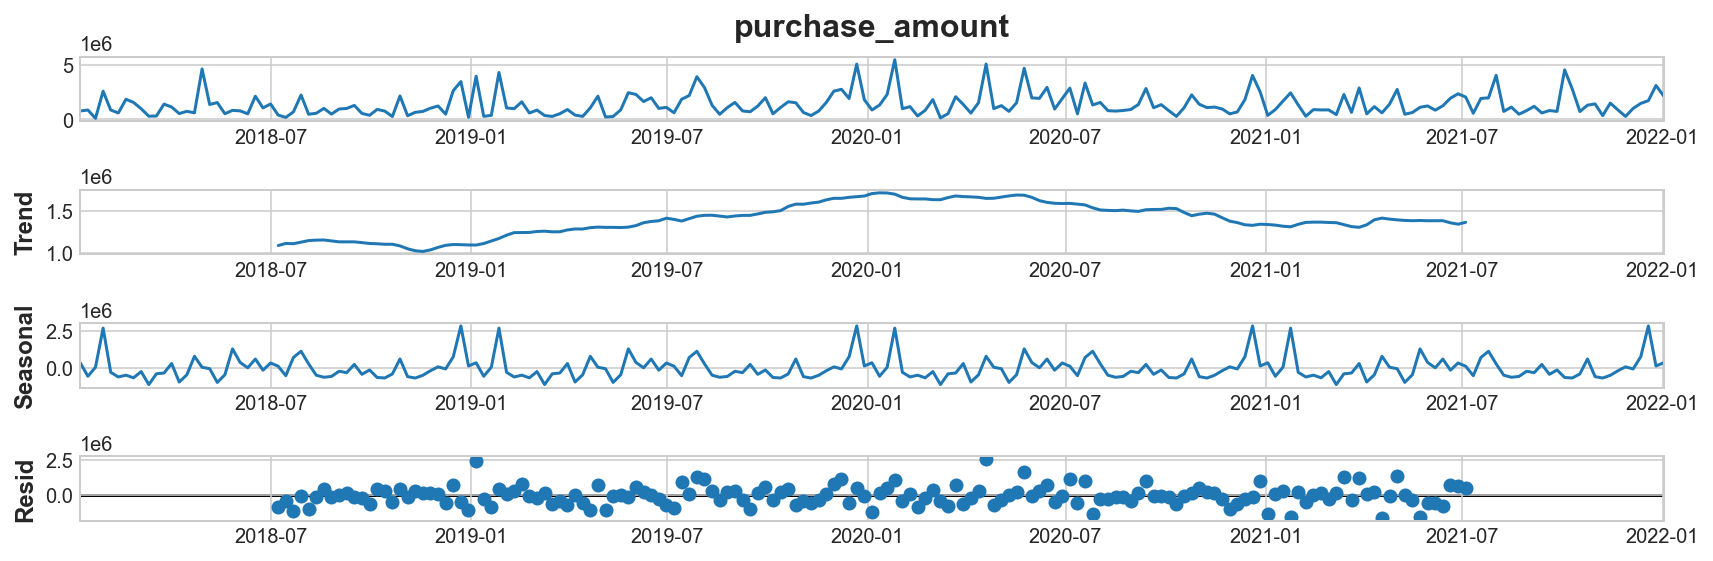

In [26]:
result_local_gov_w.plot()
None

#### Monthly

<AxesSubplot: xlabel='order_date'>

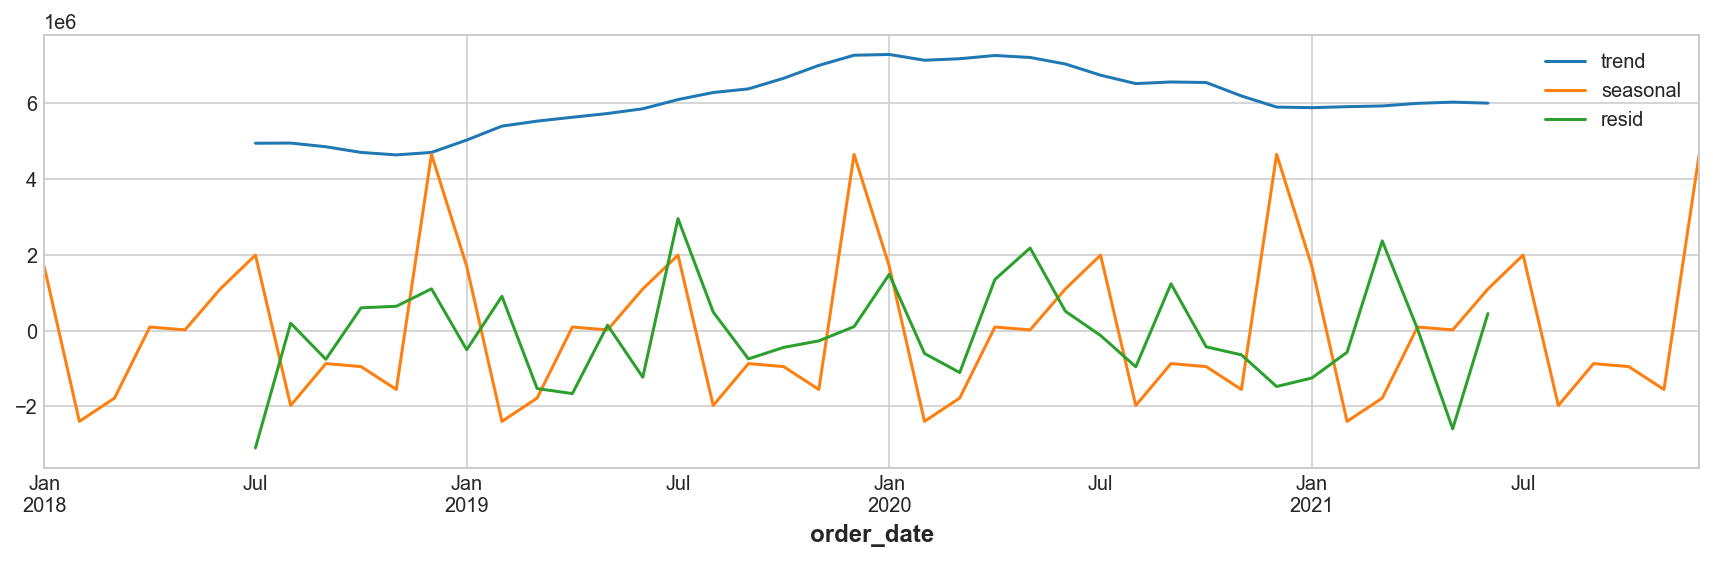

In [21]:
local_gov_m = local_gov.purchase_amount.resample('M').sum()
result_local_gov_m = sm.tsa.seasonal_decompose(local_gov_m)
decomposition_local_gov_m = pd.DataFrame({
    'y': result_local_gov_m.observed,
    'trend': result_local_gov_m.trend,
    'seasonal': result_local_gov_m.seasonal,
    'resid': result_local_gov_m.resid,
})
decomposition_local_gov_m.iloc[:, 1:].plot()

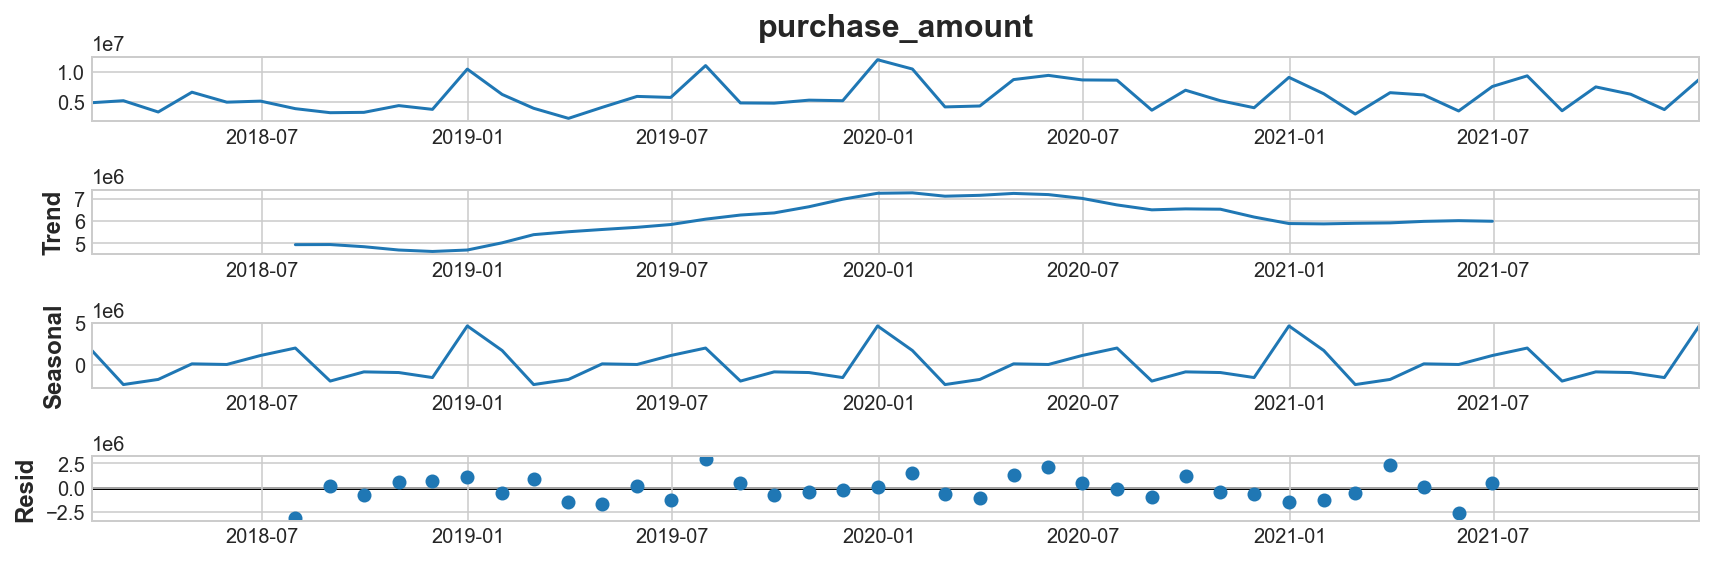

In [22]:
result_local_gov_m.plot()
None

#### Takaways:
- Local governments show a clear seasonal pattern with increase of purchases in the end of the year, almost no purchases around February.
- Monthly trend of local goverments repeat the overall trend:
    - Sales before 2019 where below the trend line, end 2019-beginning2020 way above the trend line, end 2020 and all 2021 falling below and returning to the trend line 

### State Agencies 

#### Weekly

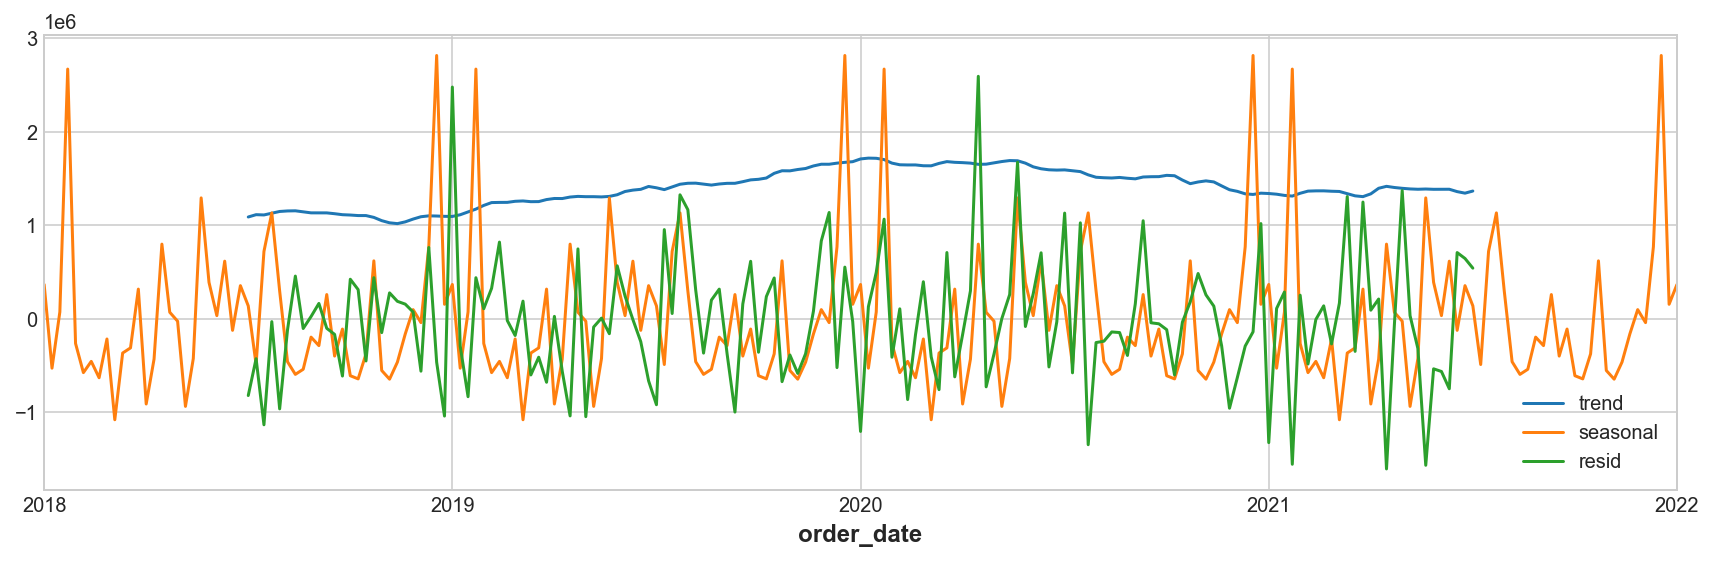

In [40]:
state_agency_w = state_agency.purchase_amount.resample('W').sum()
result_state_agency_w = sm.tsa.seasonal_decompose(local_gov_w)
decomposition_state_agency_w = pd.DataFrame({
    'y': result_state_agency_w.observed,
    'trend': result_state_agency_w.trend,
    'seasonal': result_state_agency_w.seasonal,
    'resid': result_state_agency_w.resid,
})
decomposition_state_agency_w.iloc[:, 1:].plot();

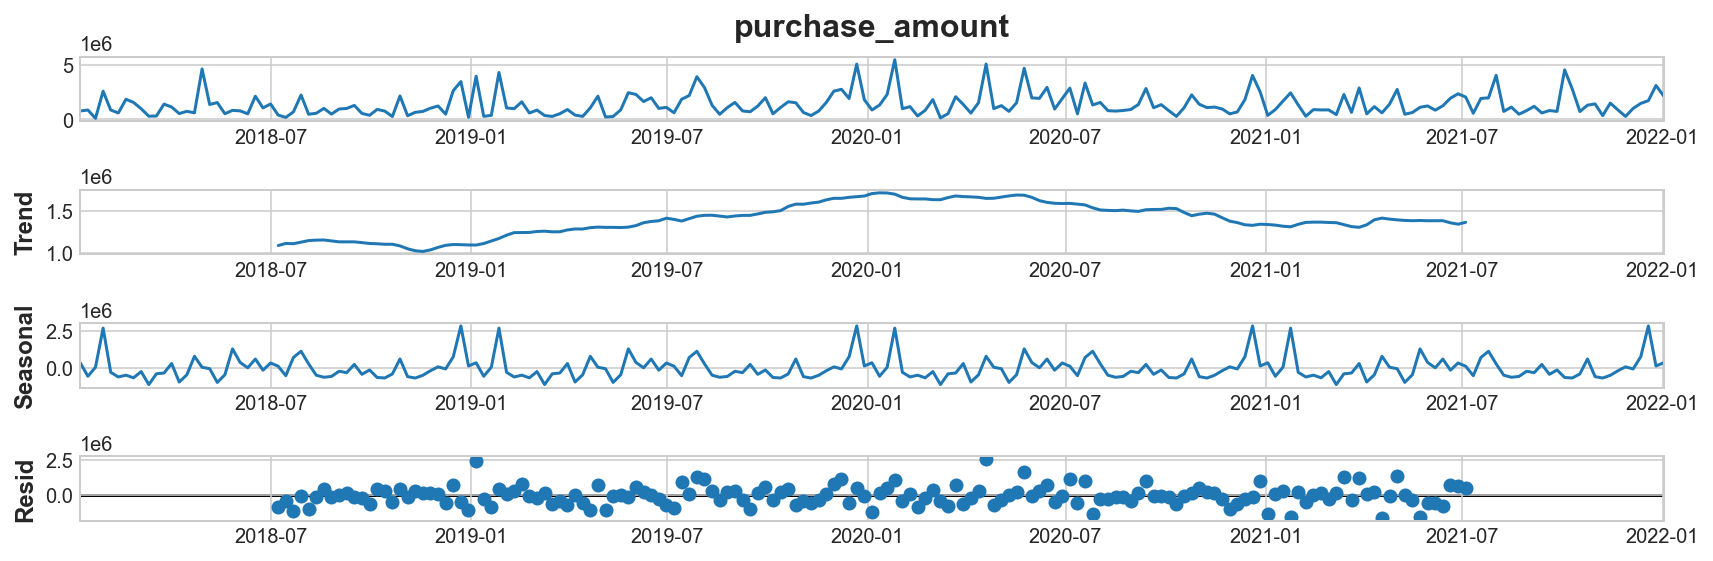

In [41]:
result_state_agency_w.plot()
None

#### Monthly

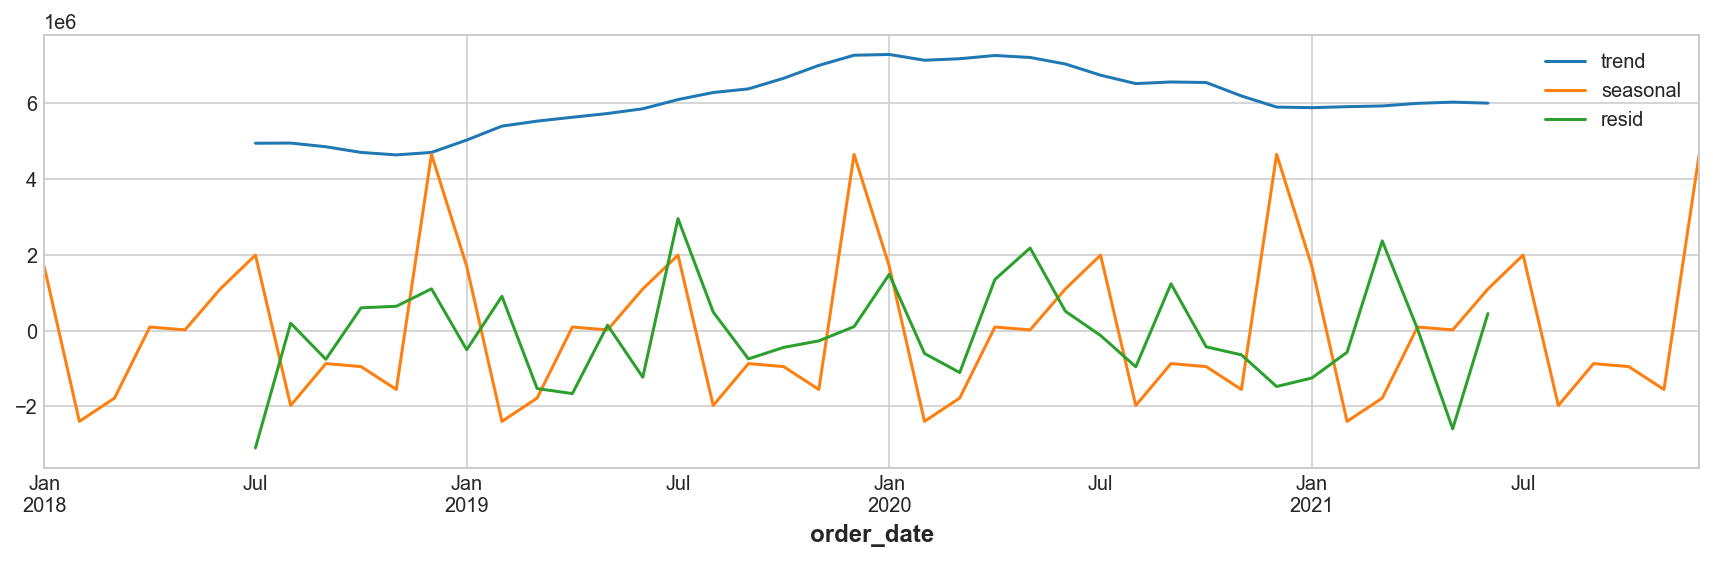

In [38]:
state_agency_m = state_agency.purchase_amount.resample('M').sum()
result_state_agency_m = sm.tsa.seasonal_decompose(local_gov_m)
decomposition_state_agency_m = pd.DataFrame({
    'y': result_state_agency_m.observed,
    'trend': result_state_agency_m.trend,
    'seasonal': result_state_agency_m.seasonal,
    'resid': result_state_agency_m.resid,
})
decomposition_state_agency_m.iloc[:, 1:].plot();

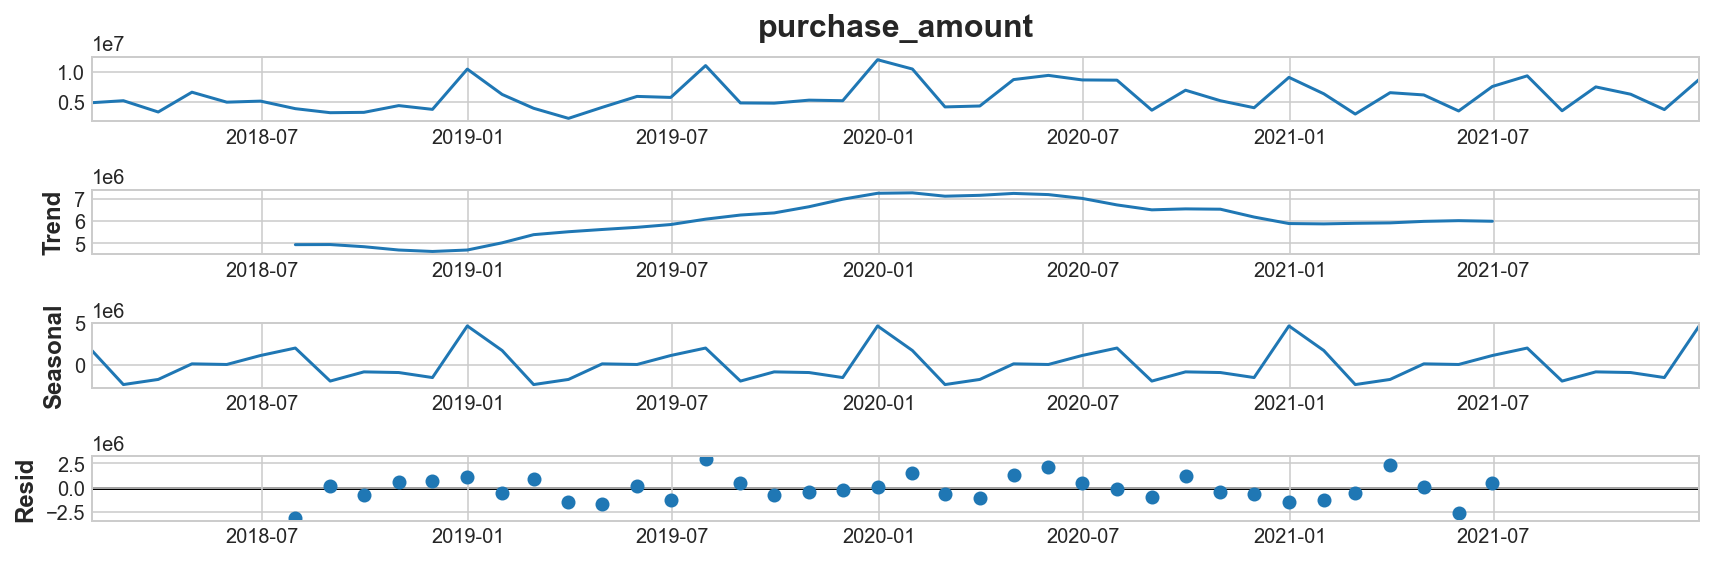

In [42]:
result_state_agency_m.plot()
None

#### State Agencies takaways:
__Seasonality:__
- There is a clear seasonality in purchases. Both: weekly and monthly.

__Trend:__
- The trend follows the general trend line.

### Others

#### Weekly

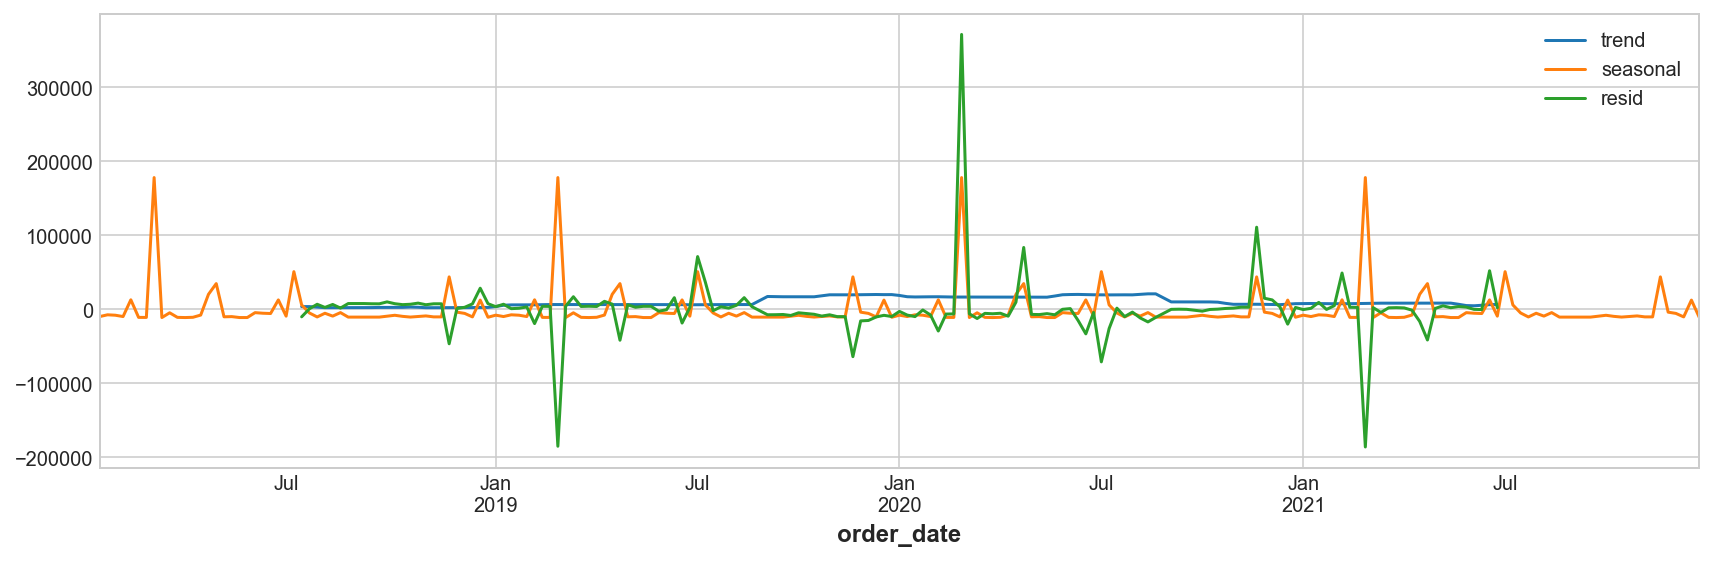

In [43]:
other_w = other.purchase_amount.resample('W').sum()
result_other_w = sm.tsa.seasonal_decompose(other_w)
decomposition_other_w = pd.DataFrame({
    'y': result_other_w.observed,
    'trend': result_other_w.trend,
    'seasonal': result_other_w.seasonal,
    'resid': result_other_w.resid,
})
decomposition_other_w.iloc[:, 1:].plot();

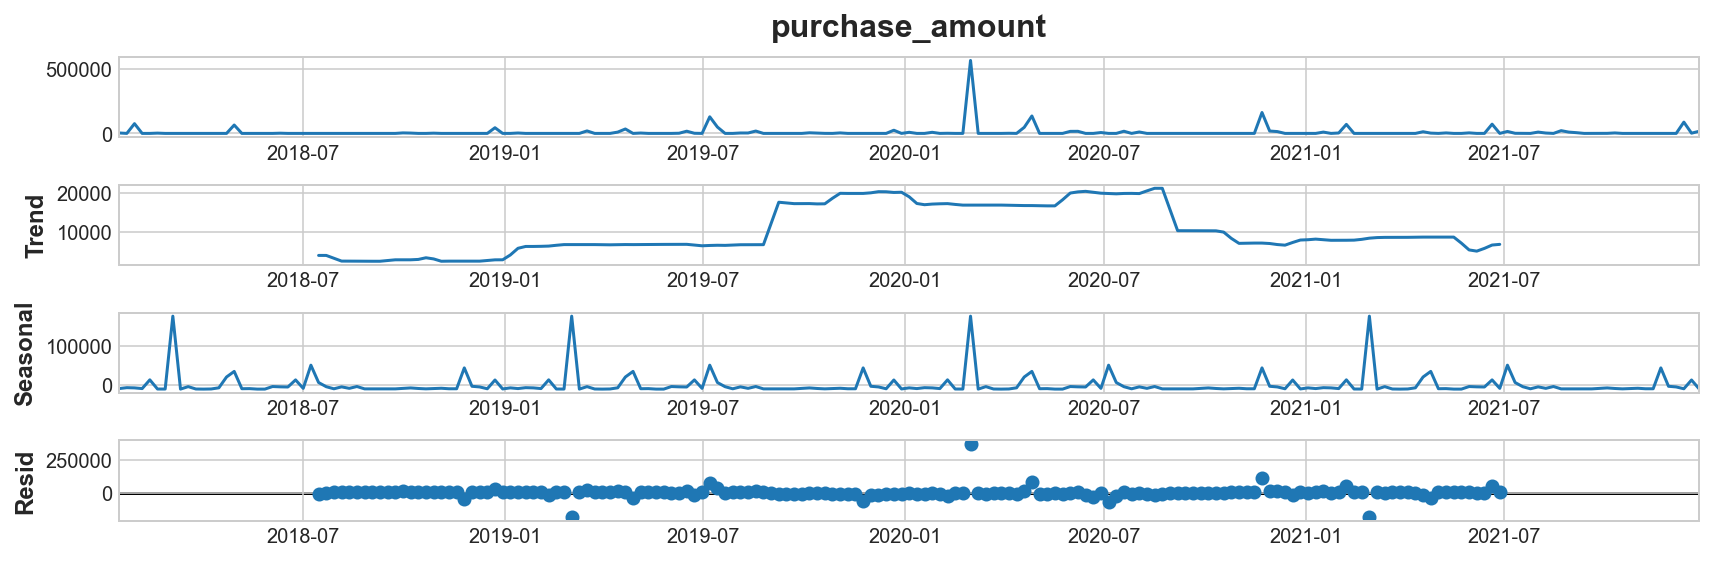

In [44]:
result_other_w.plot()
None

#### Monthly

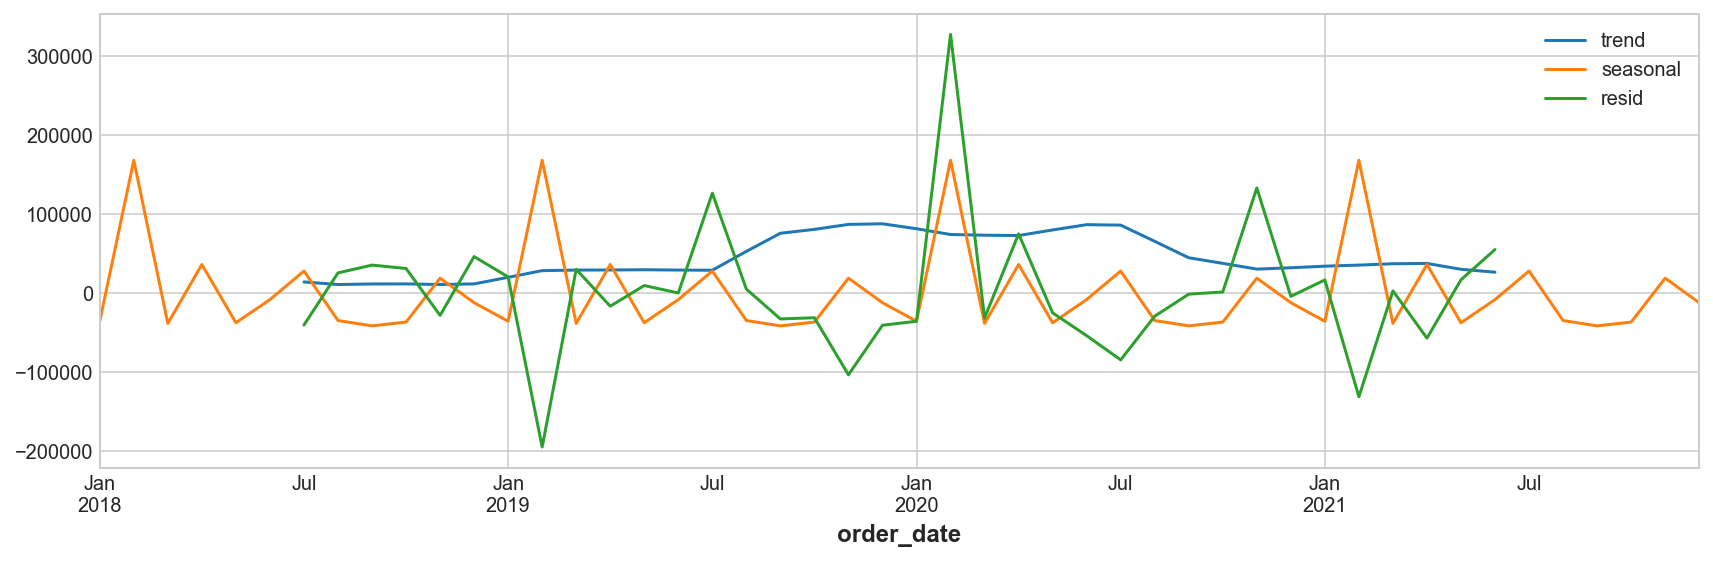

In [50]:
other_m = other.purchase_amount.resample('M').sum()
result_other_m = sm.tsa.seasonal_decompose(other_m)
decomposition_other_m = pd.DataFrame({
    'y': result_other_m.observed,
    'trend': result_other_m.trend,
    'seasonal': result_other_m.seasonal,
    'resid': result_other_m.resid,
})
decomposition_other_m.iloc[:, 1:].plot();

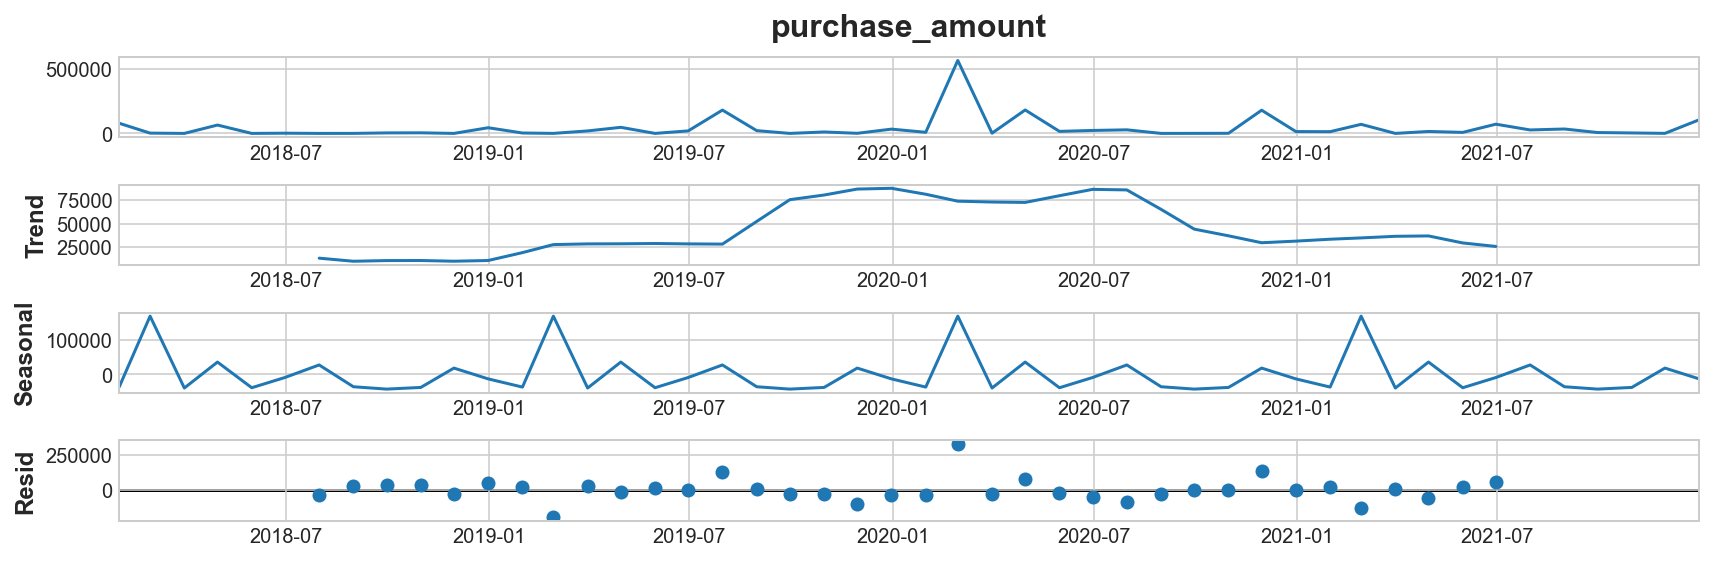

In [46]:
result_other_m.plot()
None

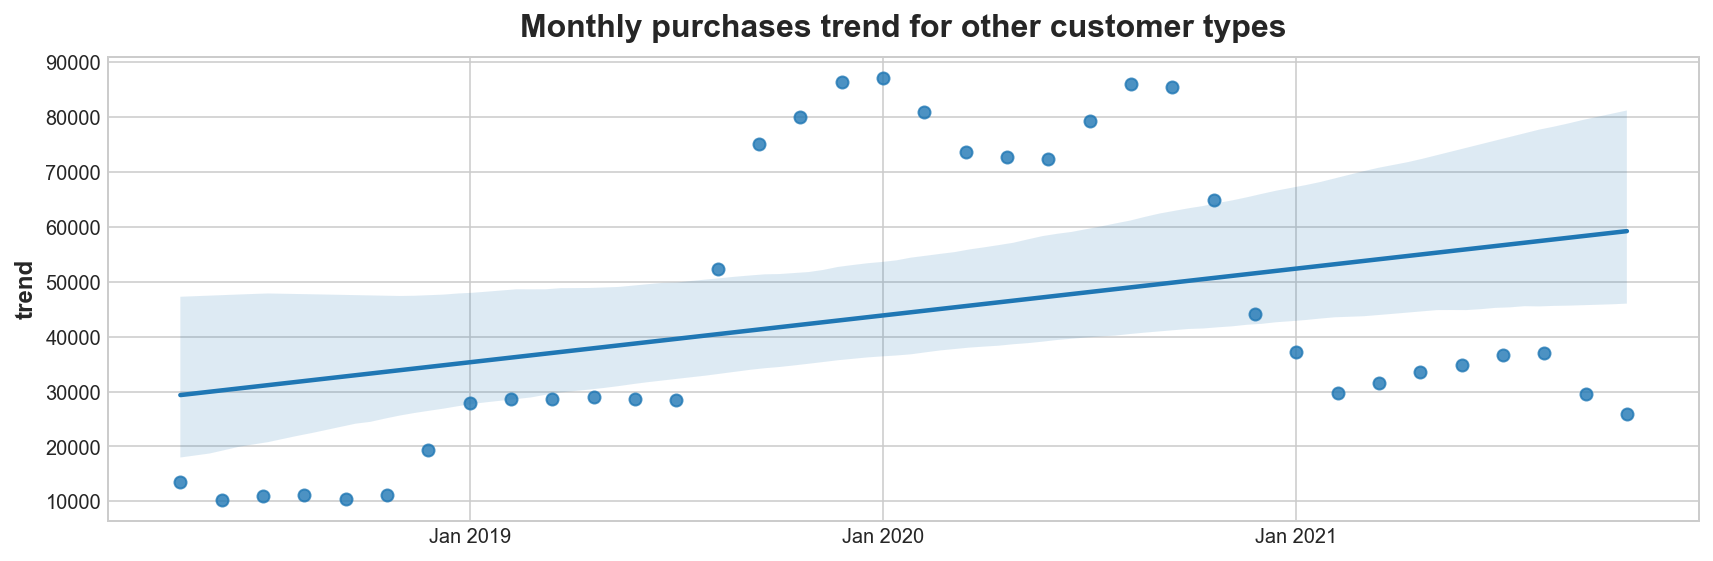

In [47]:
decomposition_other_m['time_dummy'] = np.arange(len(decomposition_other_m.index))
ax = sns.regplot(data=decomposition_other_m, x='time_dummy', y='trend')
plt.title('Monthly purchases trend for other customer types')
plt.xlabel(None)
ax.set(xticks=[13, 23, 33])
ax.set(xticklabels=['Jan 2019', 'Jan 2020', 'Jan 2021'])
plt.show()

#### Other customers takaways:
__Seasonality:__
- Looks like there is some kind of seasonal patterns.

__Trend:__
- Even there is some kind of trend line this line is less expressive as the general trend line.

In [56]:
y_monthly = train.purchase_amount.resample('M').sum()
result_m = sm.tsa.seasonal_decompose(y_monthly)
decomposition_m = pd.DataFrame({
    'y': result_m.observed,
    'trend': result_m.trend,
    'seasonal': result_m.seasonal,
    'resid': result_m.resid,
})
decomposition_m['time_dummy'] = np.arange(len(decomposition_m.index))

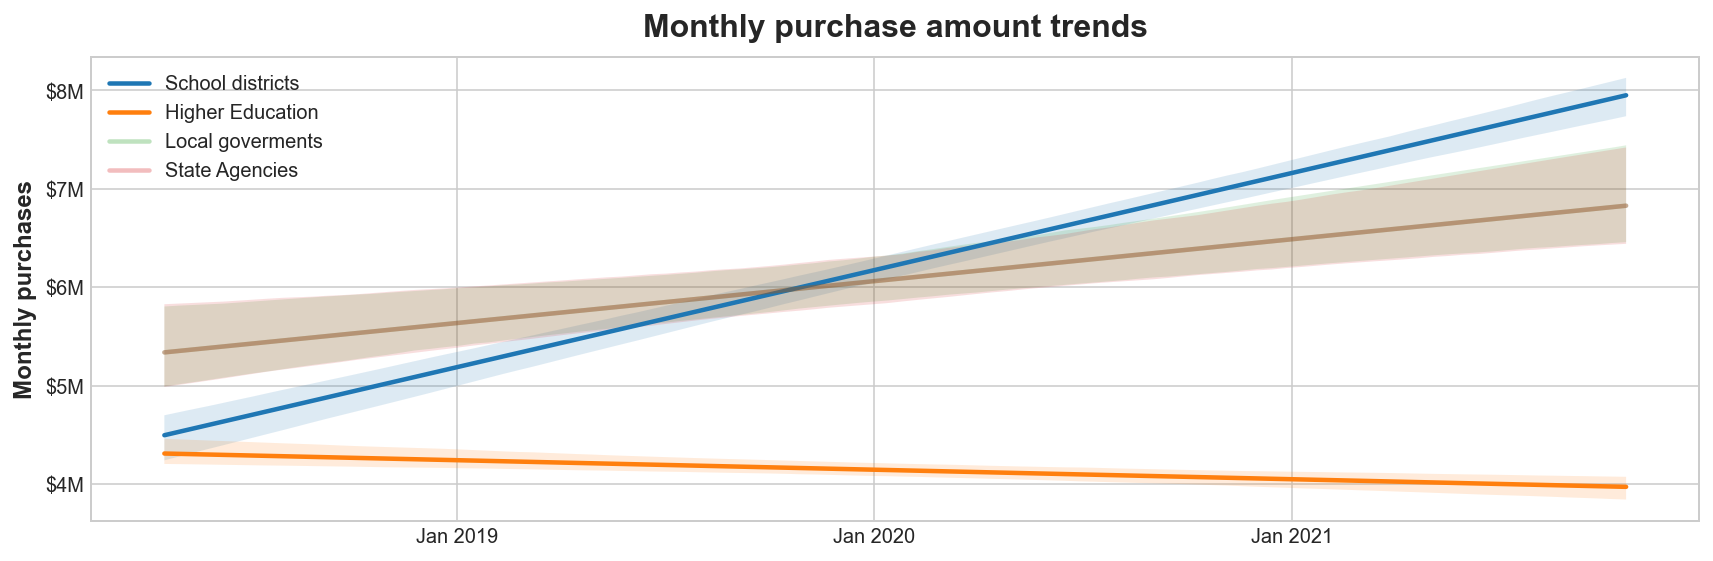

In [78]:
k12_trend = decomposition_k_12m.trend
hedu_trend = decomposition_higher_ed_m.trend
loc_gov_trend = decomposition_local_gov_m.trend
state_agency_trend = decomposition_state_agency_m.trend
other_trend = decomposition_other_m.trend
overall_trend = decomposition_m.trend
# create time dummies
time_dummy = decomposition_m.time_dummy
ax = sns.regplot(x=time_dummy, y=k12_trend, scatter=False, label='School districts')
ax = sns.regplot(x=time_dummy, y=hedu_trend, scatter=False, label='Higher Education')
ax = sns.regplot(x=time_dummy, y=loc_gov_trend, scatter=False, label='Local goverments', line_kws={'alpha':0.3})
ax = sns.regplot(x=time_dummy, y=state_agency_trend, scatter=False, label='State Agencies', line_kws={'alpha':0.3})
#ax = sns.regplot(x=time_dummy, y=other_trend, scatter=False, label='Others')
#ax = sns.regplot(x=time_dummy, y=overall_trend, label='All customers')
ax.set(xticks=[13, 23, 33])
ax.set(xticklabels=['Jan 2019', 'Jan 2020', 'Jan 2021'])
plt.xlabel(None)
ax.set(yticks=[4_000_000, 5_000_000, 6_000_000, 7_000_000, 8_000_000])
ax.set(yticklabels=['$4M', '$5M', '$6M', '$7M', '$8M'])
plt.ylabel('Monthly purchases')
plt.legend()
plt.title('Monthly purchase amount trends')
plt.show()

#### Takeaway after plotting trends
- Local governments and State agencies follow the same trend. State Agencies have a little bit higher variance of monthly purchases than Local Governments. As mentioned before they also follow the same seasonality. We can merge them into one group.